In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt

#  Extract a Noise Metric

# image_path_1 = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\images\vid_000433_frame0000005.jpg'
# image_path_2 = r'C:\Users\ASUS\OneDrive\Desktop\marine-debris-detection\data\original_data\images\vid_000003_frame0000001.jpg'

# def calculate_sharpness(image_path):
#     image = cv2.imread(image_path)
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     return cv2.Laplacian(gray, cv2.CV_64F).var()

# sharpness_1 = calculate_sharpness(image_path_1)
# sharpness_2 = calculate_sharpness(image_path_2)

# print(f"Sharpness of image 1: {sharpness_1}")
# print(f"Sharpness of image 2: {sharpness_2}")

# # Display the images 
# image_1 = cv2.imread(image_path_1)
# image_2 = cv2.imread(image_path_2)

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB))
# plt.title(f"Sharpness: {sharpness_1}")
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
# plt.title(f"Sharpness: {sharpness_2}")
# plt.axis('off')

# plt.show()




In [4]:
import cv2

# Define your sharpness calculation function
def calculate_sharpness(image_path):
    """
    Calculate the sharpness of an image using the variance of the Laplacian.
    
    Args:
        image_path (str): Path to the image file.
    
    Returns:
        float: Sharpness value (higher values indicate sharper images).
    """
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return None
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpness = laplacian.var()
    return sharpness

# Path to the sampled images text file
sampled_images_file = "sampled_images.txt"

# Read the sampled image paths from the text file
with open(sampled_images_file, 'r') as file:
    sampled_image_paths = file.read().splitlines()

# Calculate sharpness for each image
sharpness_results = []
for image_path in sampled_image_paths:
    sharpness = calculate_sharpness(image_path)
    if sharpness is not None:
        sharpness_results.append((image_path, sharpness))
        print(f"Image: {image_path}, Sharpness: {sharpness}")

# Optional: Save the sharpness results to a CSV file
import csv

output_csv = "sharpness_results.csv"
with open(output_csv, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Image Path", "Sharpness"])
    csvwriter.writerows(sharpness_results)

print(f"Sharpness results saved to {output_csv}")


Image: ../data/original_data/images\vid_000142_frame0000004.jpg, Sharpness: 2633.5844280671295
Image: ../data/original_data/images\vid_000125_frame0000021.jpg, Sharpness: 3113.8220618183577
Image: ../data/original_data/images\vid_000158_frame0000124.jpg, Sharpness: 1146.528340963411
Image: ../data/original_data/images\vid_000132_frame0000041.jpg, Sharpness: 3345.3977004729068
Image: ../data/original_data/images\vid_000288_frame0000044.jpg, Sharpness: 362.58486761496374
Image: ../data/original_data/images\vid_000273_frame0000012.jpg, Sharpness: 1005.1563107611763
Image: ../data/original_data/images\vid_000340_frame0000021.jpg, Sharpness: 3612.176557167293
Image: ../data/original_data/images\vid_000297_frame0000011.jpg, Sharpness: 154.78030181538145
Image: ../data/original_data/images\vid_000282_frame0000051.jpg, Sharpness: 366.67675555073305
Image: ../data/original_data/images\vid_000331_frame0000259.jpg, Sharpness: 2946.7059464999143
Image: ../data/original_data/images\vid_000361_frame

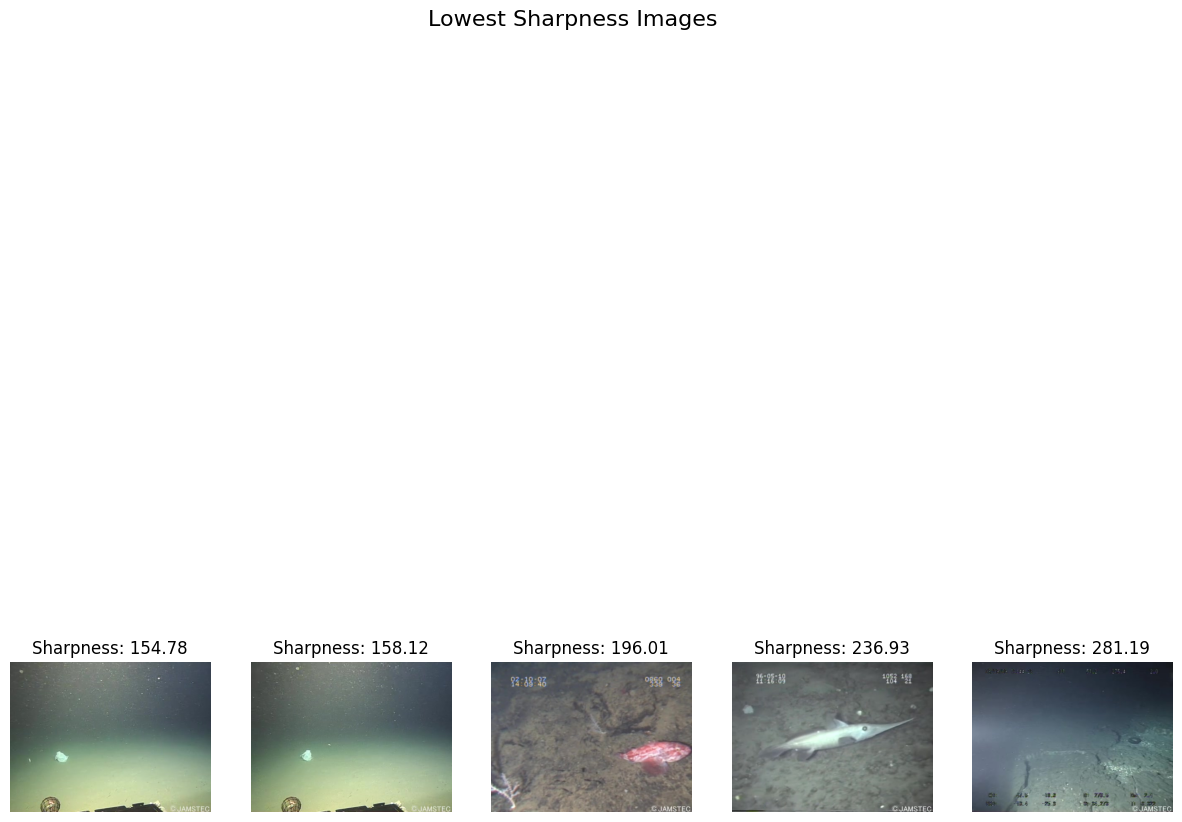

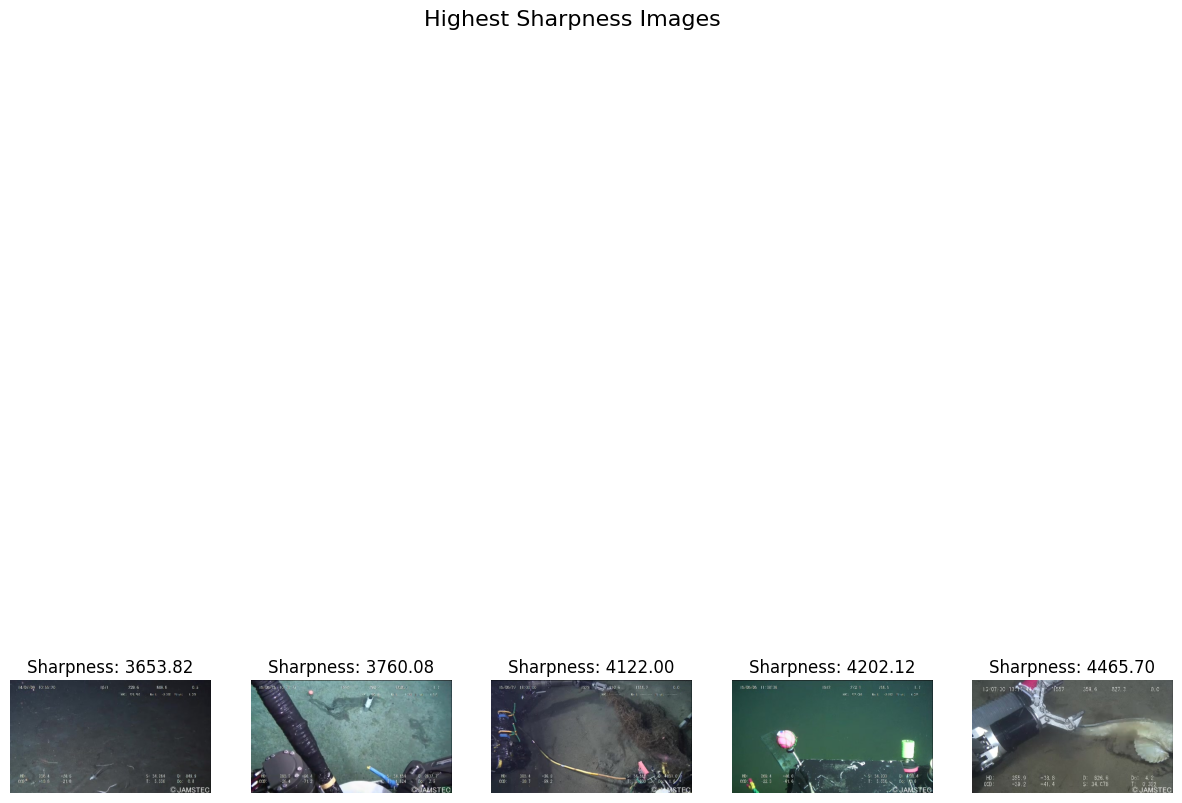

In [5]:
# Sort the sample by their sharpness values.

sorted_sharpness_results = sorted(sharpness_results, key=lambda x: x[1])

# Select 5–10 images from the lowest and highest ranges of sharpness values.

num_images = 5
lowest_sharpness_images = sorted_sharpness_results[:num_images]
highest_sharpness_images = sorted_sharpness_results[-num_images:]

# Display the selected images

import matplotlib.pyplot as plt

def display_images(image_paths, title):
    fig, axes = plt.subplots(1, len(image_paths), figsize=(15, 15))
    fig.suptitle(title, fontsize=16)
    for i, (image_path, sharpness) in enumerate(image_paths):
        image = cv2.imread(image_path)
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f"Sharpness: {sharpness:.2f}")
        axes[i].axis('off')
    plt.show()

display_images(lowest_sharpness_images, "Lowest Sharpness Images")
display_images(highest_sharpness_images, "Highest Sharpness Images")
